TypeError: pic should be Tensor or ndarray. Got <class 'PIL.PngImagePlugin.PngImageFile'>.

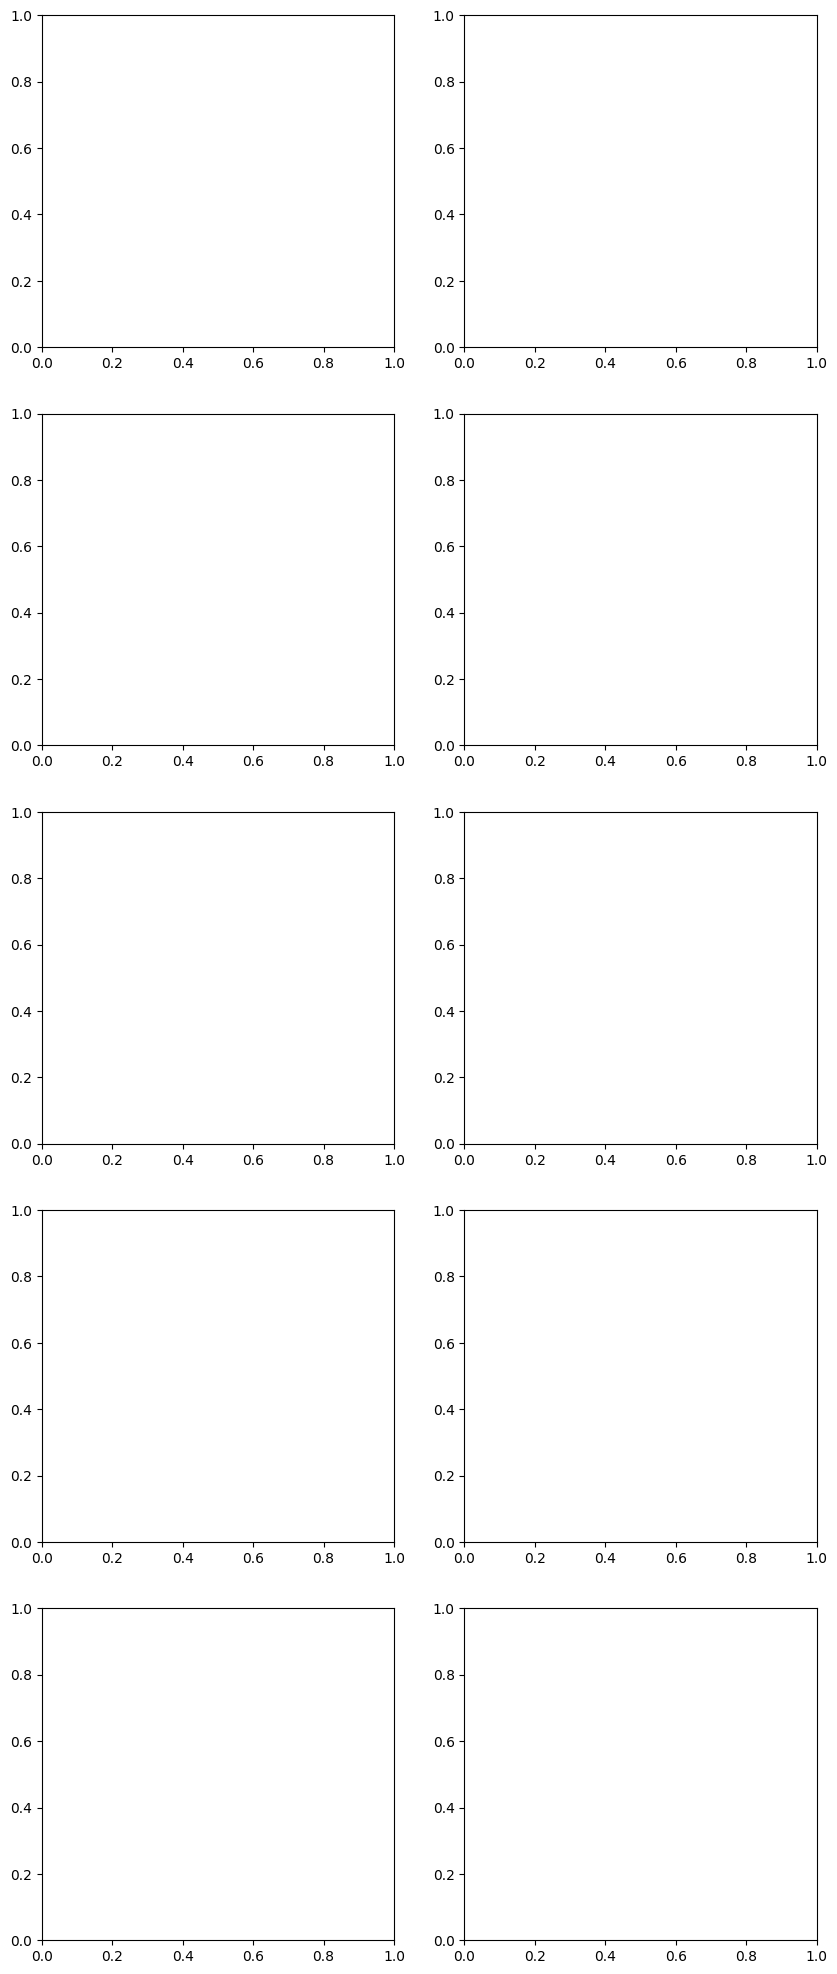

In [76]:
import torch
import torchvision
from torchvision.datasets import VOCSegmentation
from torchvision.transforms.functional import to_pil_image
from PIL import Image
import matplotlib.pyplot as plt

def get_unique_classes(dataset):
    unique_classes = set()
    for img, mask in dataset:
        classes = list(mask.getcolors())
        for count, pixel_value in classes:
            unique_classes.add(pixel_value)
    
    return unique_classes

def display_images(dataset, num_images=5):
    fig, ax = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

    for i in range(num_images):
        # 이미지 및 마스크 가져오기
        img, mask = dataset[i]
        
        img = to_pil_image(img)
        mask = to_pil_image(mask)

        # 이미지 및 마스크 표시
        ax[i, 0].imshow(img)
        ax[i, 0].set_title(f"Image {i + 1}")
        ax[i, 1].imshow(mask, cmap='gray')
        ax[i, 1].set_title(f"Segmentation Image {i + 1}")

    plt.tight_layout()
    plt.show()
    
# 데이터셋 다운로드 및 생성
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor()
])

voc_dataset = VOCSegmentation(root='~/.data', year='2012', image_set='train', download=False, transform=transforms)
voc_dataloader = torch.utils.data.DataLoader(voc_dataset, batch_size=10, shuffle=True)
# 데이터셋에서 이미지 및 마스크 표시
display_images(voc_dataset)
print(voc_dataset[0])
print(voc_dataset[0][1])
# # 데이터셋에서 고유한 객체 클래스 확인
unique_classes = get_unique_classes(voc_dataset)
# print(f"Unique classes in the dataset: {unique_classes}")

In [66]:
len(unique_classes)
num_classes = len(unique_classes)-2
num_classes

20

In [69]:
class_dict = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor', 255: 'ambigious'}


In [74]:
for img, mask in voc_dataloader:
    print(img.shape)
    print(mask.shape)
    break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [63]:
import numpy as np
def one_hot_embedding(labels, num_classes=20):
    # multi-labels
    y = torch.eye(num_classes)
    return y[labels]

classes = one_hot_embedding(classes, num_classes=num_classes)
classes


tensor([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1.])

In [31]:
import torch
from torch.utils.data import Dataset
from torchvision.datasets import VOCSegmentation
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from PIL import Image
import collections
import xml.etree.ElementTree as ET

class myVOCSegmentation(VOCSegmentation):
    def __init__(self, root, year, image_set, download=False, transform=None, target_transform=None, transforms=None):
        super().__init__(root, year, image_set, download, transform, target_transform, transforms)
        
    def __getitem__(self, index):
        img, segmentation_mask = super().__getitem__(index)
        
        find_classes = self.find_classes(segmentation_mask)

        return img, target, segmentation_mask

    def find_classes(self, segmentation_mask):
        return torch.tensor(labels, dtype=torch.int64)

In [32]:

class ResizeAndTransformBoth:
    def __init__(self, size, interpolation=Image.BILINEAR):
        self.size = size
        self.interpolation = interpolation

    def __call__(self, img, target, segmentation_mask):
        img = img.resize(self.size, self.interpolation)
        segmentation_mask = segmentation_mask.resize(self.size, self.interpolation)
        return img, target, segmentation_mask
    
# 데이터셋을 정의하고 다운로드 받는 부분 (예시)
root = "data/"
year = "2012"
image_set = "train"

# 이미지 및 Segmentation_mask를 224x224로 변환
resize_transform = ResizeAndTransformBoth((224, 224))

class CustomTransforms:
    def __init__(self, resize_transform, tensor_transform, normalize_transform):
        self.resize_transform = resize_transform
        self.tensor_transform = tensor_transform
        self.normalize_transform = normalize_transform

    def __call__(self, img, target, segmentation_mask):
        img, _, segmentation_mask = self.resize_transform(img, target, segmentation_mask)
        img = self.tensor_transform(img)
        img = self.normalize_transform(img)
        segmentation_mask = self.tensor_transform(segmentation_mask)
        return img, target, segmentation_mask
    
# 데이터셋을 정의하고 변환 작업 추가
transforms = CustomTransforms(
    resize_transform,
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

dataset = VOCSegmentation(root, year, image_set, download=False, transforms=transforms)


In [33]:

# 데이터셋을 확인하는 부분 (예시)
dataset[0]

FileNotFoundError: [Errno 2] No such file or directory: 'data//VOC2012/Annotations/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg.xml'

In [5]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_contours_on_image(image, segmentation_mask, color=(0, 255, 0), thickness=2):
    # 이미지와 세그멘테이션 마스크를 NumPy 배열로 변환
    image_np = np.array(image)
    segmentation_mask_np = np.array(segmentation_mask)

    # 세그멘테이션 마스크의 각 고유한 라벨에 대해 컨투어를 찾아 이미지에 그림
    for label in np.unique(segmentation_mask_np):
        if label == 0:  # 배경에 해당하는 라벨을 무시
            continue

        mask = np.zeros_like(segmentation_mask_np)
        mask[segmentation_mask_np == label] = 255
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 컨투어를 이미지에 그림
        cv2.drawContours(image_np, contours, -1, color, thickness)

    return image_np

# 데이터셋에서 샘플 이미지 및 세그멘테이션 마스크를 가져옴
img, target, segmentation_mask = dataset[0]

# 컨투어를 그릴 이미지를 PIL 이미지로 변환
image_with_contours = Image.fromarray(draw_contours_on_image(img, segmentation_mask))

# 이미지를 출력
plt.figure(figsize=(10, 10))
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

TypeError: __call__() takes 2 positional arguments but 3 were given